# Suicide report

This report contains the analysis of suicides recorded from 1985 to 2016. The data sample is from [Kaggle](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016 "Suicide Rates Overview 1985 to 2016").

## Table of contents
1. [Report summary](#1.-Report-summary)
2. [Initialization](#2.-Initialization)
    1. [Libraries used](#2-A.-Libraries-used)
    2. [Initial dataframe](#2-B.-Initial-dataframe)
3. [Data cleaning](#3.-Data-cleaning)
    1. [Removed columns](#3-A.-Removed-columns)
    2. [Filtered rows](#3-B.-Filtered-rows)
4. [Visualisation](#4.-Visualisation)
    1. [By Year](#4-A.-By-Year)
    2. [By Sex](#4-B.-By-Sex)
    3. [By Age](#4-C.-By-Age)
    4. [By Country](#4-D.-By-Country)

## 1. Report summary

The following was concluded by the analysis in this file:

- **Standard deviation**: The high standard deviation indicates that the average alone does not provide an accurate representation due to the variability in the data by any of the features used.
- **Peak period (1999-2003)**: The number of suicides exceeded 250,000.
- **Drastic increase (1988-1996)**: A continuous and significant rise in the number of suicides.
- **Long-term trend (1985 onwards)**: The average number of suicides per 100,000 people increased until it peaked in 1995, followed by a steady decline over the next 20 years.
- **Gender distribution**: It is likely that out of every 4 people who commit suicide, 3 are men.
- **Highest suicide rates**: The age group 35-54 had the most suicides, followed by the 55-74 age group.
- **Elderly group (75+)**: This group has the highest average suicide rates and the greatest standard deviation.
- **Countries with most suicides**: The US, Russian Federation, and Japan have the highest numbers of suicides.

With the above summary further analyses could be done to deepen the understanding of the dataset.

## 2. Initialization

### 2-A. Libraries used

In [1]:
using CSV
using DataFrames
using StatsPlots
using Statistics

### 2-B. Initial dataframe

In [2]:
df = CSV.read("suicide.csv", DataFrame)
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,country,,Albania,,Uzbekistan,0,String31
2,year,2001.26,1985,2002.0,2016,0,Int64
3,sex,,female,,male,0,String7
4,age,,15-24 years,,75+ years,0,String15
5,suicides_no,242.574,0,25.0,22338,0,Int64
6,population,1.84479e6,278,430150.0,43805214,0,Int64
7,suicides/100k pop,12.8161,0.0,5.99,224.97,0,Float64
8,country-year,,Albania1987,,Uzbekistan2014,0,String
9,HDI for year,0.776601,0.483,0.779,0.944,19456,"Union{Missing, Float64}"


[Back to top](#Suicide-report)

## 3. Data cleaning

If we want to have insights regarding the data we stored up, it's important to clean it off of noise and outliers first and have the missing values handled. There are also times when we would simply drop rows or columns by specific criteria.

### 3-A. Removed columns

The following features were removed from the analysis:

- **HDI for year**: mostly missing records
- **generation**: simply inaccurate, since the age groups could contain different generation members one should be ruled out (this column isn't included in the description of the initial dataset)
- **country-year**: grouping for gdp metrics
- **gdp for year**: depends on population size, data granularity is on country-year level only
- **gdp per capita**: data granularity is on country-year level only


In [3]:
df = select(df, Not([:"country-year", :"HDI for year", :" gdp_for_year (\$) ", :"gdp_per_capita (\$)", :"generation"]))

Row,country,year,sex,age,suicides_no,population,suicides/100k pop
,String31,Int64,String7,String15,Int64,Int64,Float64
1,Albania,1987,male,15-24 years,21,312900,6.71
2,Albania,1987,male,35-54 years,16,308000,5.19
3,Albania,1987,female,15-24 years,14,289700,4.83
4,Albania,1987,male,75+ years,1,21800,4.59
5,Albania,1987,male,25-34 years,9,274300,3.28
6,Albania,1987,female,75+ years,1,35600,2.81
7,Albania,1987,female,35-54 years,6,278800,2.15
8,Albania,1987,female,25-34 years,4,257200,1.56
9,Albania,1987,male,55-74 years,1,137500,0.73


[Back to top](#Suicide-report)

### 3-B. Filtered rows

For starters I checked features that are more likely to be significant and could contains outliers. Then set specific boundaries for each, then shape our initial dataframe to be a usable dataset.

In [4]:
nrow(df)

27820

#### By country

In [5]:
rowcount_by_country = combine(
    groupby(df, :country),
    nrow => :rowcount
)

sort(rowcount_by_country, :rowcount)

Row,country,rowcount
,String31,Int64
1,Mongolia,10
2,Cabo Verde,12
3,Dominica,12
4,Macau,12
5,Bosnia and Herzegovina,24
6,Oman,36
7,Saint Kitts and Nevis,36
8,San Marino,36
9,Nicaragua,72


In [6]:
countries_to_keep = filter(row -> row.rowcount >= 100, rowcount_by_country).country
df = filter(row -> row.country in countries_to_keep, df)

nrow(df)

27414

As we can see above, there are countries with little more than 10 records of data, while there are countries with over 300 number of rows. In the report I want every country to have at least 100 rows to be included. While this affects the results, it also makes the evaluation more accurate by using only significant data. The exact number can balance, but can also inbalance the analysis so it should be picked with caution.

[Back to top](#Suicide-report)

#### By year

In [7]:
rowcount_by_year = combine(
    groupby(df, :year),
    nrow => :rowcount
)

sort(rowcount_by_year, :rowcount)

Row,year,rowcount
,Int64,Int64
1,2016,150
2,1985,564
3,1986,576
4,1988,588
5,1989,624
6,1987,648
7,2015,720
8,1990,756
9,1991,756


In [8]:
years_to_keep = filter(row -> row.rowcount >= 500, rowcount_by_year).year
df = filter(row -> row.year in years_to_keep, df)

nrow(df)

27264

The only outlier here was the amount of data for 2016, so I set a rowcount minimum of 500 - considering the other groups.

[Back to top](#Suicide-report)

#### By age

In [9]:
rowcount_by_age = combine(
    groupby(df, :age),
    nrow => :rowcount
)

sort(rowcount_by_age, :rowcount)

Row,age,rowcount
,String15,Int64
1,15-24 years,4544
2,35-54 years,4544
3,75+ years,4544
4,25-34 years,4544
5,55-74 years,4544
6,5-14 years,4544


There was no need to alter.

[Back to top](#Suicide-report)

## 4. Visualisation

### 4-A. By Year

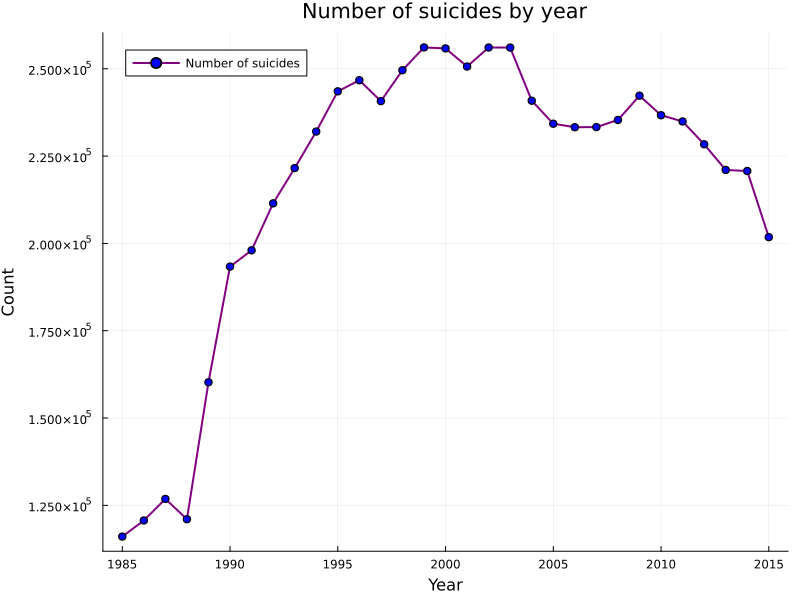

In [10]:
suicides_year = combine(
    groupby(df, :year),
    :"suicides/100k pop" => mean => :"suicide_rate_avg/100k pop",
    :"suicides/100k pop" => std => :"suicide_rate_std/100k pop",
    :suicides_no => sum => :total_suicides
)

plot(suicides_year.year,
    suicides_year.total_suicides,
    title="Number of suicides by year",
    xlabel="Year",
    ylabel="Count",
    label="Number of suicides",
    lw=2,
    linecolor=:purple,
    marker=:circle,
    markersize=4,
    markercolor=:blue,
    size=(800, 600)
)

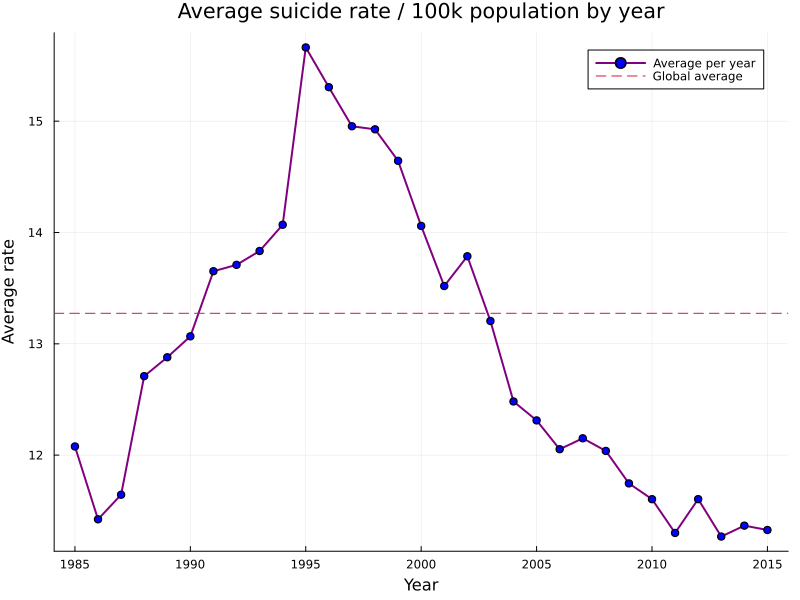

In [11]:
plot(suicides_year.year,
    suicides_year."suicide_rate_avg/100k pop",
    title="Average suicide rate / 100k population by year",
    xlabel="Year",
    ylabel="Average rate",
    label="Average per year",
    lw=2,
    linecolor=:purple,
    marker=:circle,
    markersize=4,
    markercolor=:blue,
    size=(800, 600)
)

suicide_avg_per_100k = sum(df.suicides_no) / sum(df.population) * 100_000
hline!([suicide_avg_per_100k], linestyle=:dash, color=:crimson, label="Global average")

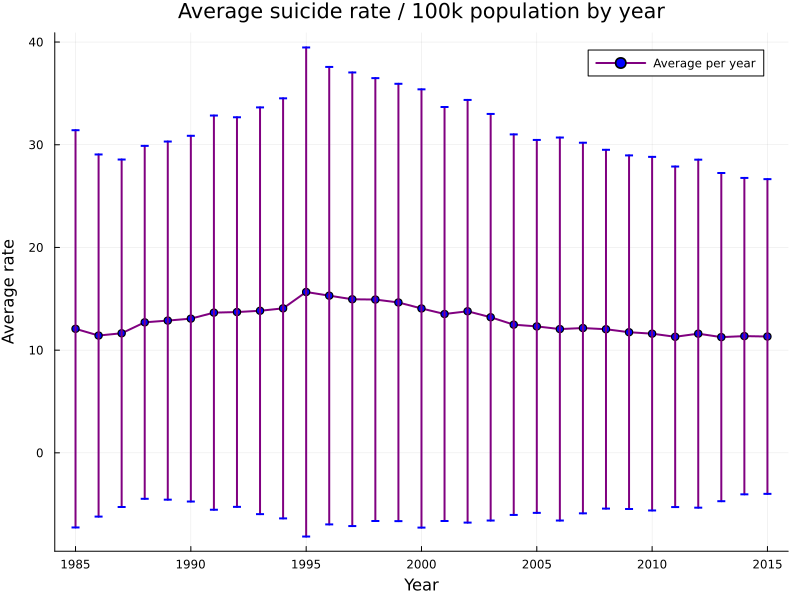

In [12]:
plot(suicides_year.year,
    suicides_year."suicide_rate_avg/100k pop",
    yerr = suicides_year."suicide_rate_std/100k pop",
    title="Average suicide rate / 100k population by year",
    xlabel="Year",
    ylabel="Average rate",
    label="Average per year",
    lw=2,
    linecolor=:purple,
    marker=:circle,
    markersize=4,
    markercolor=:blue,
    size=(800, 600)
)

**Observations**:

- From 1999 to 2003 was the peak, when the number of suicides reached over 250 000.
- From 1988 until 1996 there was a drastic, continous increase in the nuber of suicides.
- Since 1985, the average number of suicides per 100 000 people has increased, but this increase peaked in 1995 and has steadily declined for 20 years.
- Lower bound on average: ~11
- Upper bound on average: ~15
- Global average: ~13
- Standard deviation score is so high, that it would lead to fallacies to only look at average.

[Back to top](#Suicide-report)

### 4-B. By Sex

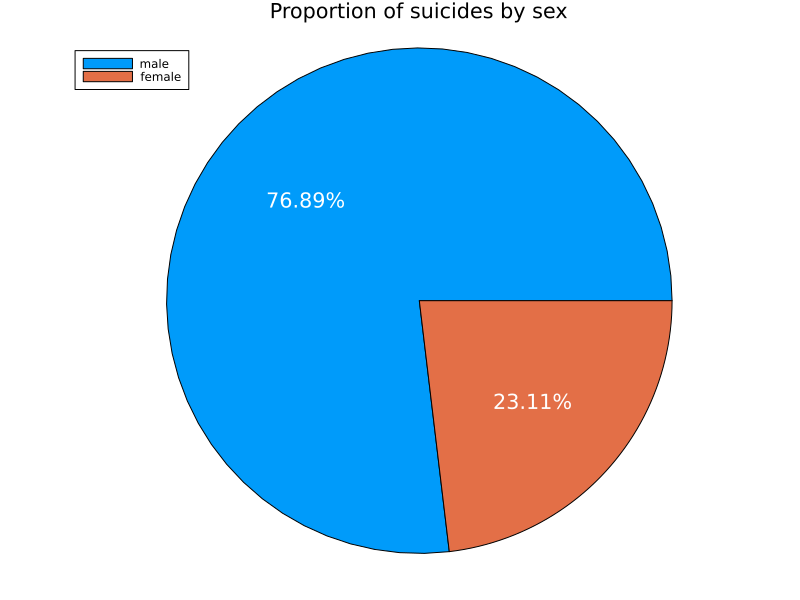

In [13]:
suicides_by_gender = combine(
    groupby(df, :sex),
    :suicides_no => sum => :total_suicides,
    :"suicides/100k pop" => mean => :"suicide_rate_avg/100k pop",
    :"suicides/100k pop" => std => :"suicide_rate_std/100k pop",
)

total = sum(suicides_by_gender.total_suicides)
percentages = suicides_by_gender.total_suicides ./ total .* 100

angles = cumsum([0; 2 * pi * suicides_by_gender.total_suicides ./ total])
percentage_labels = [string(round(percentages[i], digits=2), "%") for i in 1:length(suicides_by_gender.sex)]

p = pie(suicides_by_gender.sex, suicides_by_gender.total_suicides, title="Proportion of suicides by sex", size=(800, 600))

for i in 1:length(suicides_by_gender.sex)
    angle = (angles[i] + angles[i+1]) / 2
    x = 0.6 * cos(angle)
    y = 0.6 * sin(angle)
    annotate!(x, y, text(percentage_labels[i], :center, 14, "white"))
end

p

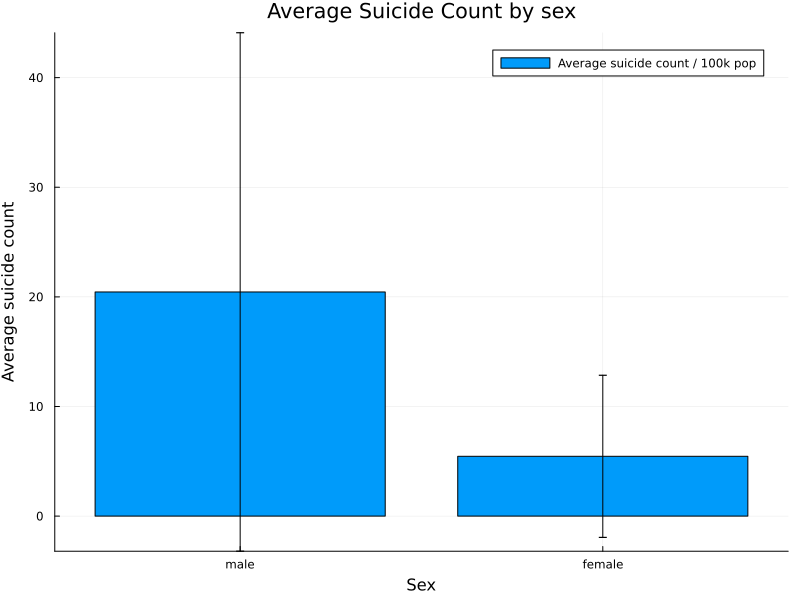

In [14]:
bar(suicides_by_gender.sex,
    suicides_by_gender."suicide_rate_avg/100k pop",
    title="Average Suicide Count by sex",
    label="Average suicide count / 100k pop",
    xlabel="Sex",
    ylabel="Average suicide count",
    yerr = suicides_by_gender."suicide_rate_std/100k pop",
    legend=:topright,
    size=(800, 600)
)

**Observations**:

- Based on the sample it is likely, that out of 4 people who commit suicide, 3 are men.
- Going by averages, for men the value is around 20 and for women around 5.
- The error rates (standard deviation) is really high so the average in itself isn't a good measurement.

[Back to top](#Suicide-report)

## 4-C. By Age

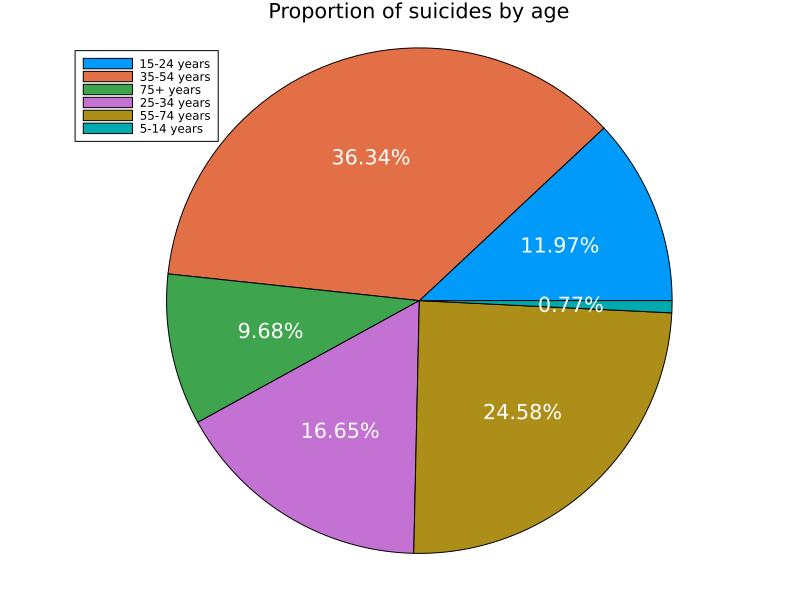

In [15]:
suicides_by_age = combine(
    groupby(df, :age),
    :suicides_no => sum => :total_suicides,
    :"suicides/100k pop" => mean => :"suicide_rate_avg/100k pop",
    :"suicides/100k pop" => std => :"suicide_rate_std/100k pop",
)

total = sum(suicides_by_age.total_suicides)
percentages = suicides_by_age.total_suicides ./ total .* 100

angles = cumsum([0; 2 * pi * suicides_by_age.total_suicides ./ total])
percentage_labels = [string(round(percentages[i], digits=2), "%") for i in 1:length(suicides_by_age.age)]

p = pie(suicides_by_age.age, suicides_by_age.total_suicides, title="Proportion of suicides by age", size=(800, 600))

for i in 1:length(suicides_by_age.age)
    angle = (angles[i] + angles[i+1]) / 2
    x = 0.6 * cos(angle)
    y = 0.6 * sin(angle)
    annotate!(x, y, text(percentage_labels[i], :center, 14, "white"))
end

p

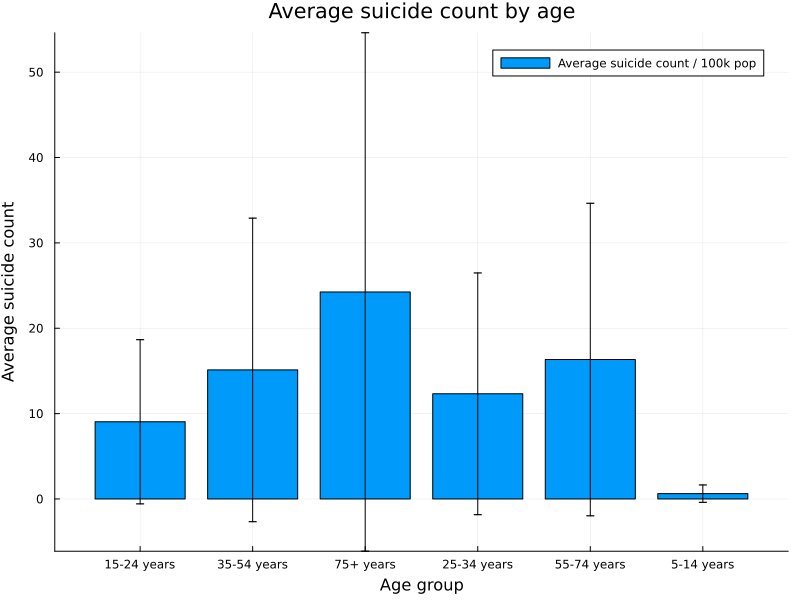

In [16]:
bar(suicides_by_age.age,
    suicides_by_age."suicide_rate_avg/100k pop",
    title="Average suicide count by age",
    label="Average suicide count / 100k pop",
    xlabel="Age group",
    ylabel="Average suicide count",
    yerr = suicides_by_age."suicide_rate_std/100k pop",
    legend=:topright,
    size=(800, 600)
)

**Observations**:

- Most of the suicides happened in the group 35-54, following this by 55-74.
- The greatest average and also the greatest std value can be found in the group of elderly (75+).

## 4-D. By Country

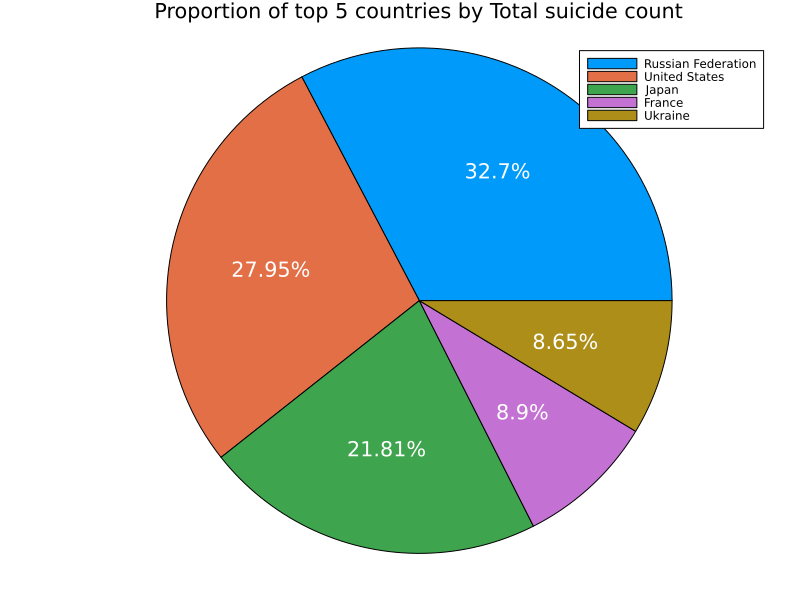

In [17]:
suicides_by_country = combine(
    groupby(df, :country),
    :suicides_no => sum => :total_suicides,
    :"suicides/100k pop" => mean => :"suicide_rate_avg/100k pop",
    :"suicides/100k pop" => std => :"suicide_rate_std/100k pop",
)

top10_countries_by_total_suicides = sort(suicides_by_country, :total_suicides, rev=true)[1:5, :]

total = sum(top10_countries_by_total_suicides.total_suicides)
percentages = top10_countries_by_total_suicides.total_suicides ./ total .* 100

angles = cumsum([0; 2 * pi * top10_countries_by_total_suicides.total_suicides ./ total])
percentage_labels = [string(round(percentages[i], digits=2), "%") for i in 1:length(top10_countries_by_total_suicides.country)]

p = pie(top10_countries_by_total_suicides.country, top10_countries_by_total_suicides.total_suicides, title="Proportion of top 5 countries by Total suicide count", size=(800, 600))

for i in 1:length(top10_countries_by_total_suicides.country)
    angle = (angles[i] + angles[i+1]) / 2
    x = 0.6 * cos(angle)
    y = 0.6 * sin(angle)
    annotate!(x, y, text(percentage_labels[i], :center, 14, "white"))
end

p

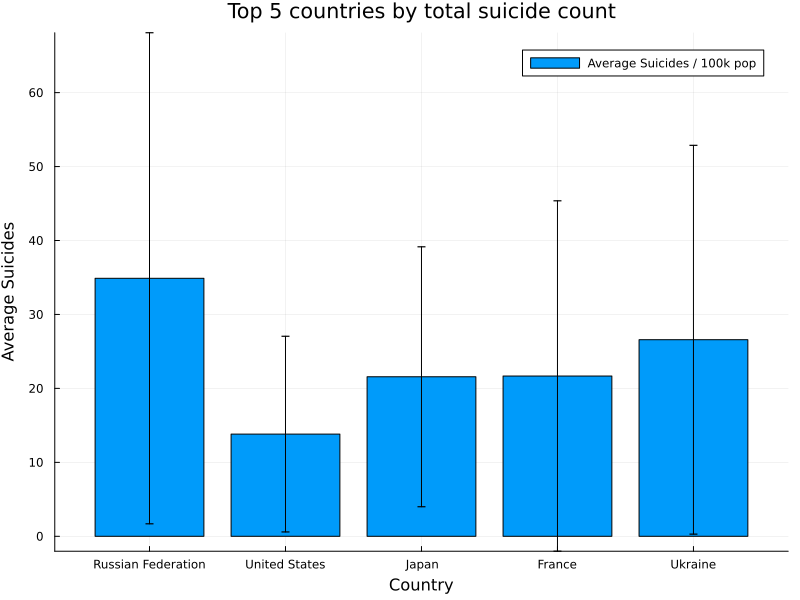

In [18]:
bar(top10_countries_by_total_suicides.country,
    top10_countries_by_total_suicides."suicide_rate_avg/100k pop",
    title="Top 5 countries by total suicide count",
    label="Average Suicides / 100k pop",
    xlabel="Country",
    ylabel="Average Suicides",
    yerr = top10_countries_by_total_suicides."suicide_rate_std/100k pop",
    legend=:topright,
    size=(800, 600)
)

**Observations**:

- Most of the suicides happened in the US, Russian Federation and Japan.
- However going by averages the US is still contributing the least given it's population.
- Standard deviation is once again high in value.
- Russian Federation is leading the top in averages with ~35, followed by the ~27 of Ukraine.

[Back to top](#Suicide-report)